In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

from session.sessions import selected_009266, selected_009265
from loading import load_session_data
from imports import *
import numpy as np
import h5py
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import signal
from scipy import stats
import pandas as pd
from aeps import AEP_metrics_lims
from population import unit_response_matrix, activity_at_phase
from sklearn import decomposition

%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Background / Target

In [4]:
source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
#source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

# 009266
# sessions = [s for s in selected_009266.keys()]
# sessions.sort()
# selected = sessions[:]
# selected.remove('009266_hippoSIT_2023-04-20_15-24-14')


# 009265
# sessions = [s for s in selected_009265.keys()]
# sessions.sort()
# selected = sessions[:]
# selected.remove('009265_hippoSIT_2023-02-27_10-18-32')
# selected.remove('009265_hippoSIT_2023-02-27_15-33-46')
# selected = selected[7:-1]


# animal 57
# selected = [
#     "57_SIT_2023-12-21_15-05-52",
#     "57_SIT_2023-12-22_14-08-07",
#     "57_SIT_2023-12-22_17-37-18",
#     "57_SIT_2023-12-28_16-43-28",
#     "57_SIT_2023-12-29_11-06-26",
#     "57_SIT_2023-12-29_11-40-14",
#     "57_SIT_2024-01-02_16-38-05",
#     "57_SIT_2024-01-02_17-10-09",
#     "57_SIT_2024-01-03_19-54-59",
# ]

selected = [
    "57_SIT_2023-12-22_14-08-07",
    "57_SIT_2023-12-22_14-43-58",
    "57_SIT_2023-12-22_17-37-18",
    "57_SIT_2023-12-28_16-43-28",
    "57_SIT_2023-12-29_11-06-26",
    "57_SIT_2023-12-29_11-40-14",
    "57_SIT_2023-12-29_12-11-46",
    "57_SIT_2024-01-02_14-43-18",
    "57_SIT_2024-01-02_16-38-05",
    "57_SIT_2024-01-02_17-10-09",
    "57_SIT_2024-01-03_19-22-18",
    "57_SIT_2024-01-03_19-54-59",
    "57_SIT_2024-01-04_14-16-22",
    "57_SIT_2024-01-04_14-52-59",
    "57_SIT_2024-01-05_14-35-49",
    "57_SIT_2024-01-05_15-08-34",
    "57_SIT_2024-01-06_16-52-40",
    "57_SIT_2024-01-06_17-25-35",
    "57_SIT_2024-01-07_19-23-28",
    "57_SIT_2024-01-07_19-59-26",
    "57_SIT_2024-01-08_15-51-26",
    "57_SIT_2024-01-15_13-45-22",
    "57_SIT_2024-01-15_14-34-48",
    "57_SIT_2024-02-01_15-51-41",
    "57_SIT_2024-02-05_13-10-00"
]

selected = [
    "57_SIT_2023-12-22_14-08-07",  # good
    "57_SIT_2023-12-22_14-43-58",  # good
    "57_SIT_2023-12-28_16-43-28",  # good
    "57_SIT_2023-12-29_11-06-26",  # good
    "57_SIT_2023-12-29_11-40-14",  # good
    "57_SIT_2024-01-02_16-38-05",  # good
    "57_SIT_2024-01-03_19-22-18",  # good
    "57_SIT_2024-01-05_14-35-49",  # good
    "57_SIT_2024-01-06_17-25-35",  # good
]
# showcase
# selected = [
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-05-23_09-18-05'
# ]
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009265_hippoSIT_2023-03-05_11-52-17'
# ]

# showcase for Fig. 5
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-04-18_10-10-37',
#     '009266_hippoSIT_2023-04-20_08-57-39',
#     '009266_hippoSIT_2023-04-24_10-08-11',
#     '009266_hippoSIT_2023-04-26_08-20-17',
#     '009266_hippoSIT_2023-05-02_12-22-14',
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-05-23_09-18-05',
#     '009265_hippoSIT_2023-03-03_09-37-07',
#     '009265_hippoSIT_2023-03-04_11-12-04',
#     '009265_hippoSIT_2023-03-05_11-52-17',
# ]

selected

['57_SIT_2023-12-22_14-08-07',
 '57_SIT_2023-12-22_14-43-58',
 '57_SIT_2023-12-28_16-43-28',
 '57_SIT_2023-12-29_11-06-26',
 '57_SIT_2023-12-29_11-40-14',
 '57_SIT_2024-01-02_16-38-05',
 '57_SIT_2024-01-03_19-22-18',
 '57_SIT_2024-01-05_14-35-49',
 '57_SIT_2024-01-06_17-25-35']

In [5]:
session = selected[0]

animal     = session.split('_')[0]
meta_file  = os.path.join(source, animal, session, 'meta.h5')
aeps_file  = os.path.join(source, animal, session, 'AEPs.h5')
state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')
desc_file  = os.path.join(source, animal, session, 'descendants.h5')

with h5py.File(state_file, 'r') as f:
    print([x for x in f])
    idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bE state


['idxs_AL_ev', 'idxs_AL_tl', 'idxs_PC_ev', 'idxs_PC_tl', 'idxs_neuro_AL_bgr_ev', 'idxs_neuro_AL_sil_ev', 'idxs_neuro_PH_bgr_ev', 'idxs_neuro_PH_sil_ev']


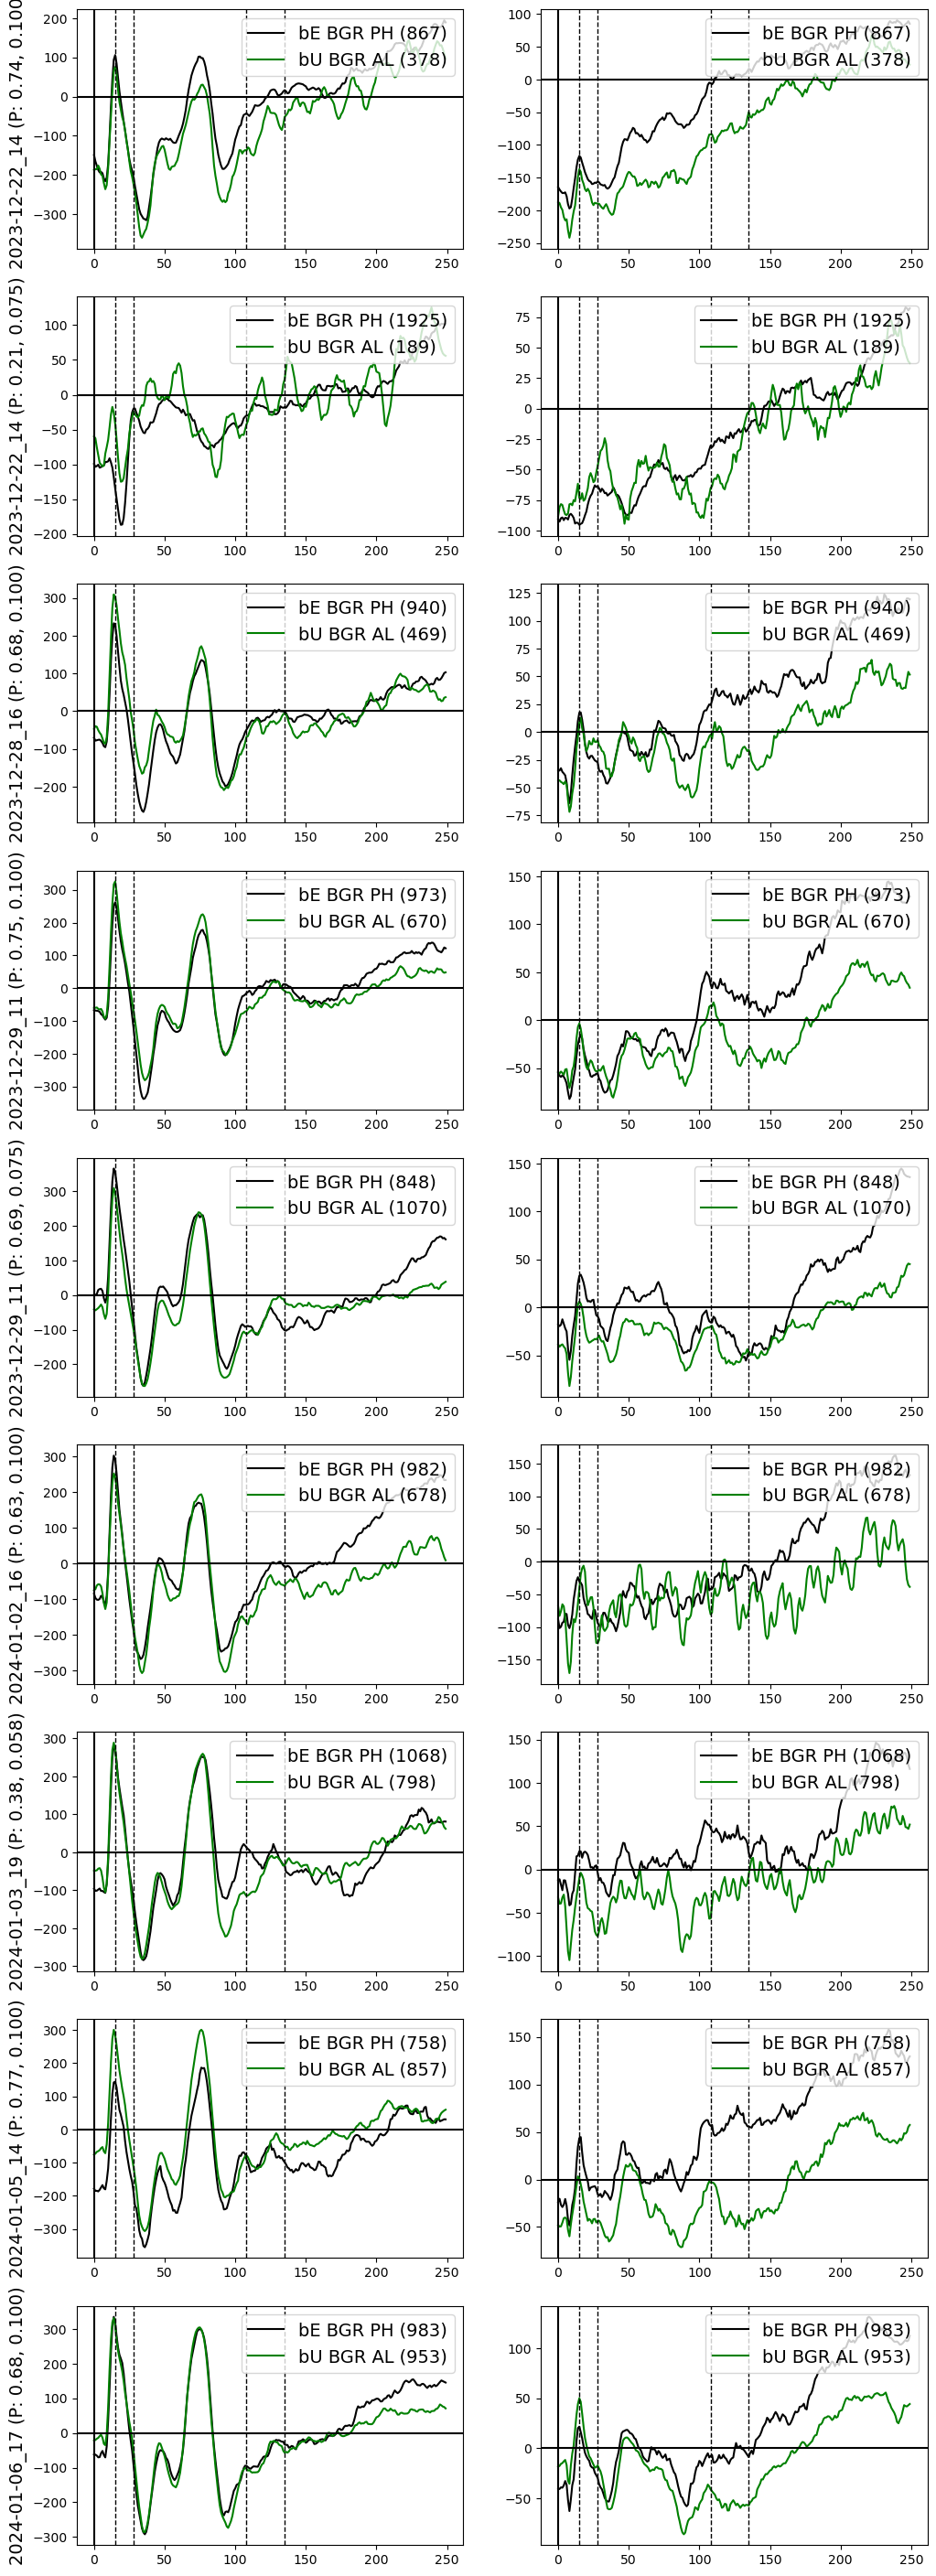

In [7]:
all_areas = ['A1', 'PPC']
cols = len(all_areas)
rows = len(selected)
speed_thresh = 0.04  # m/s

fig = plt.figure(figsize=(6*cols, 4*rows))

for i, session in enumerate(selected):
    animal     = session.split('_')[0]
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    aeps_file  = os.path.join(source, animal, session, 'AEPs.h5')
    state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    
    # getting AEPs
    aeps = {}
    with h5py.File(aeps_file, 'r') as f:
        for area in all_areas:
            if not area in f:
                continue
            ds_name = [ds for ds in f[area]][0]
            aeps[area] = np.array(f[area][ds_name])
    with h5py.File(meta_file, 'r') as f:
        cfg = json.loads(f['processed'].attrs['parameters'])
        events = np.array(f['processed']['sound_events'])
        trials = np.array(f['processed']['trial_idxs'])
    with h5py.File(desc_file, 'r') as f:
       speed = np.array(f['speed'])
    with h5py.File(state_file, 'r') as f:
       idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bE state
       idxs_nAL_ev = np.array(f['idxs_neuro_AL_bgr_ev'])  # bE state
       idxs_nPH_ev = np.array(f['idxs_neuro_PH_bgr_ev'])  # bE state
       
    # print 3*std for info
    #print("A1: %.2f, PPC: %.2f" % (3*aeps['A1'].std(), 3*aeps['PPC'].std()))
    
    tr_succ = trials[trials[:, 5] == 1]
    performance = len(tr_succ) / (len(trials))

    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]  # define speed filter here
    idxs_run_ev = np.where(speed[events[:, 2].astype(np.int32)] > speed_thresh)[0]  # define speed filter here
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial
    
    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_AL_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_AL_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_AL_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_AL_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)
    idxs_PH_bgr_run_ev  = np.intersect1d(idxs_PH_bgr_ev, idxs_run_ev)
    
    areas = list(aeps.keys())
    if 'A1' in areas:
        aeps['A1'][aeps['A1'] >  5000]   =   5000
        aeps['A1'][aeps['A1'] < -5000]   =  -5000
    if 'PPC' in areas:
        aeps['PPC'][aeps['PPC'] >  1500] =   1500
        aeps['PPC'][aeps['PPC'] < -1500] =  -1500
    
    # plotting
    # - AL vs PH in BGR
    # - AL vs PH in BGR (sta only)
    # - AL vs PH in SIL
    idxs_A = idxs_PH_bgr_rest_ev #idxs_PH_bgr_run_ev
    idxs_B = idxs_AL_bgr_rest_ev #idxs_PH_bgr_rest_ev
    labels = ['bE BGR PH', 'bU BGR AL', 'BGR all']
    for j, area in enumerate(areas):
        ax = fig.add_subplot(rows, cols, 2*i+1+j)
        aeps_bgr_mean = aeps[area][idxs_A].mean(axis=0)
        aeps_tgt_mean = aeps[area][idxs_B].mean(axis=0)
        
        ax.plot(aeps_bgr_mean, color='black', label="%s (%d)" % (labels[0], len(idxs_A)))
        ax.plot(aeps_tgt_mean, color='green', label="%s (%d)" % (labels[1], len(idxs_B)))
        ax.axhline(0, color='black')
        ax.axvline(0, color='black')
        ax.legend(loc='upper right', prop={'size': 14})
        if j == 0:
            ax.set_ylabel('%s (P: %.2f, %.3f)' % (session[-19:-6], performance, \
                        float(cfg['sound']['sounds']['target']['duration'])), fontsize=14)

        # plot metric lims - A1 2/3
        #for m_name, lims in AEP_metrics_lims[area].items():
        #    ax.axvline(lims[0], color='black', ls='--')
        #ax.axvline(AEP_metrics_lims[area]['P3'][1], color='black', ls='--', lw=1)
        
        for val in [15, 28, 108, 135]:
            ax.axvline(val, color='black', ls='--', lw=1)
        
        
#fig.savefig(os.path.join(report, 'AEPs', animal, 'AEPs_avgs_%s_%s_%s.pdf' % (animal, str(idx_l), str(idx_r))))b

## Success / miss

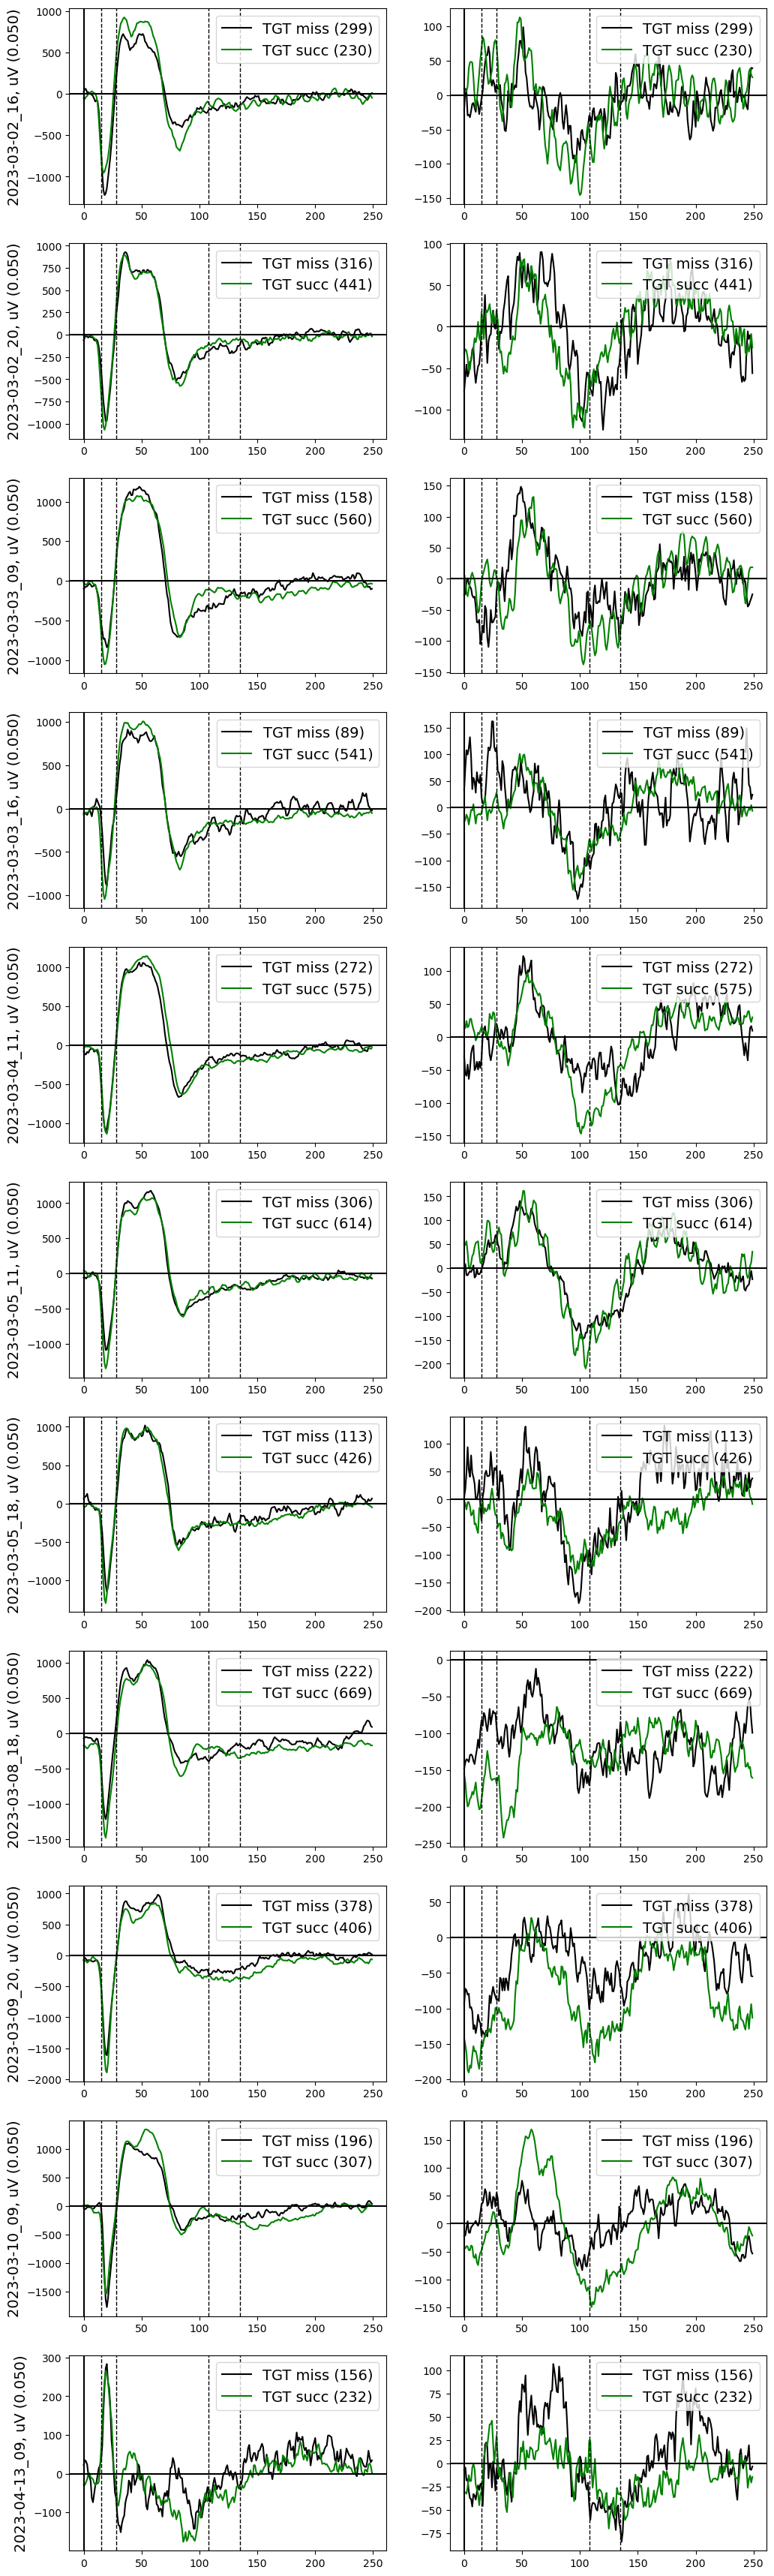

In [5]:
all_areas = ['A1', 'PPC']
cols = len(all_areas)
rows = len(selected)
speed_thresh = 0.04  # m/s

fig = plt.figure(figsize=(6*cols, 4*rows))

for i, session in enumerate(selected):
    animal     = session.split('_')[0]
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    aeps_file  = os.path.join(source, animal, session, 'AEPs.h5')
    state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    
    # getting AEPs
    aeps = {}
    with h5py.File(aeps_file, 'r') as f:
        for area in all_areas:
            if not area in f:
                continue
            ds_name = [ds for ds in f[area]][0]
            aeps[area] = np.array(f[area][ds_name])
    with h5py.File(meta_file, 'r') as f:
        cfg = json.loads(f['processed'].attrs['parameters'])
        events = np.array(f['processed']['sound_events'])
        tgt_mx = np.array(f['processed']['target_matrix'])
    with h5py.File(desc_file, 'r') as f:
       speed = np.array(f['speed'])
    with h5py.File(state_file, 'r') as f:
       idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bE state
    # print 3*std for info
    #print("A1: %.2f, PPC: %.2f" % (3*aeps['A1'].std(), 3*aeps['PPC'].std()))
    
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]  # define speed filter here
    idxs_run_ev = np.where(speed[events[:, 2].astype(np.int32)] > speed_thresh)[0]  # define speed filter here
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial
    
    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_AL_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_AL_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_AL_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_AL_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)
    idxs_PH_bgr_run_ev  = np.intersect1d(idxs_PH_bgr_ev, idxs_run_ev)

    idxs_succ_ev = []
    for tgt_rec in tgt_mx[tgt_mx[:, 4] == 1]:
        idxs_succ_ev += [x for x in range(tgt_rec[0], tgt_rec[1])]
    idxs_miss_ev = []
    for tgt_rec in tgt_mx[tgt_mx[:, 4] == 0]:
        idxs_miss_ev += [x for x in range(tgt_rec[0], tgt_rec[1])]
    
    areas = list(aeps.keys())
    if 'A1' in areas:
        aeps['A1'][aeps['A1'] >  5000]   =   5000
        aeps['A1'][aeps['A1'] < -5000]   =  -5000
    if 'PPC' in areas:
        aeps['PPC'][aeps['PPC'] >  1500] =   1500
        aeps['PPC'][aeps['PPC'] < -1500] =  -1500
    
    # plotting
    # - AL vs PH in BGR
    # - AL vs PH in BGR (sta only)
    # - AL vs PH in SIL
    idxs_A = idxs_miss_ev #idxs_PH_bgr_run_ev
    idxs_B = idxs_succ_ev #idxs_PH_bgr_rest_ev
    labels = ['TGT miss', 'TGT succ']
    for j, area in enumerate(areas):
        ax = fig.add_subplot(rows, cols, 2*i+1+j)
        aeps_bgr_mean = aeps[area][idxs_A].mean(axis=0)
        aeps_tgt_mean = aeps[area][idxs_B].mean(axis=0)
        
        ax.plot(aeps_bgr_mean, color='black', label="%s (%d)" % (labels[0], len(idxs_A)))
        ax.plot(aeps_tgt_mean, color='green', label="%s (%d)" % (labels[1], len(idxs_B)))
        ax.axhline(0, color='black')
        ax.axvline(0, color='black')
        ax.legend(loc='upper right', prop={'size': 14})
        if j == 0:
            ax.set_ylabel('%s, uV (%.3f)' % (session[-19:-6], float(cfg['sound']['sounds']['target']['duration'])), fontsize=14)

        # plot metric lims - A1 2/3
        #for m_name, lims in AEP_metrics_lims[area].items():
        #    ax.axvline(lims[0], color='black', ls='--')
        #ax.axvline(AEP_metrics_lims[area]['P3'][1], color='black', ls='--', lw=1)
        
        for val in [15, 28, 108, 135]:
            ax.axvline(val, color='black', ls='--', lw=1)
        
        
#fig.savefig(os.path.join(report, 'AEPs', animal, 'AEPs_avgs_%s_%s_%s.pdf' % (animal, str(idx_l), str(idx_r))))